In [20]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold


## Preparing Data For Training

In [21]:
# import airfil_self_noise.csv
df = pd.read_csv('/content/communities.csv')
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,...,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,...,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,...,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,...,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,...,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [22]:
X_train ,y_train= df.iloc[:,:-1],df.iloc[:,-1:]

## Linear Regression Algorithm

In [33]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)

lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)
scores = cross_validate(model, X_train, y_train, cv=crossvalidation,
 n_jobs=1)

lr_time = scores['fit_time'].mean()
print(lr_time)
lr_score = scores['test_score'].mean()
print(lr_score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.025667881965637206
0.6539611558180427


## k-Nearest-Neighbors (k-NN) Algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier

knn = KNeighborsClassifier(n_neighbors = 50)
# Fit the classifier to the data

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

model = knn.fit(X_train,y_train_encoded)
scores = cross_validate(model, X_train, y_train_encoded, cv=crossvalidation,
n_jobs=1)

kn_time = scores['fit_time'].mean()
print(kn_time)
kn_score = scores['test_score'].mean()
print(kn_score)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.014112401008605956
0.06872110552763819


### K-NN Algorithm Tuning

In [44]:
from sklearn.neighbors import KNeighborsClassifier


knData = {}
knTime = {}

neighbours = [2, 5, 10, 50, 100, 500, 1000]
for n in neighbours:
  knn = KNeighborsClassifier(n_neighbors = n)
  # Fit the classifier to the data

  from sklearn import preprocessing
  lab_enc = preprocessing.LabelEncoder()
  y_train_encoded = lab_enc.fit_transform(y_train)

  model = knn.fit(X_train,y_train_encoded)
  scores = cross_validate(model, X_train, y_train_encoded, cv=crossvalidation,
  n_jobs=1)
  knData[n] = scores['test_score'].mean()
  knTime[n] = scores['fit_time'].mean()

print(knData)
print(knTime)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{2: 0.05467085427135678, 5: 0.05367336683417086, 10: 0.05517336683417086, 50: 0.06872110552763819, 100: 0.07374120603015075, 500: 0.072213567839196, 1000: 0.05768090452261306}
{2: 0.013756632804870605, 5: 0.014717769622802735, 10: 0.014678692817687989, 50: 0.014181828498840332, 100: 0.014523911476135253, 500: 0.014284920692443848, 1000: 0.0025010108947753906}


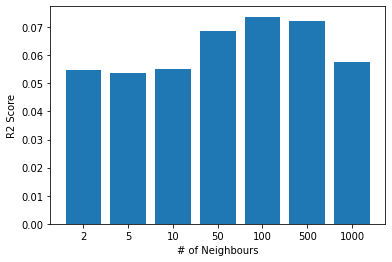

In [47]:
plt.bar(range(len(knData)), list(knData.values()), align='center')
plt.xticks(range(len(knData)), list(knData.keys()))
plt.xlabel("# of Neighbours")
plt.ylabel("R2 Score")
plt.show()

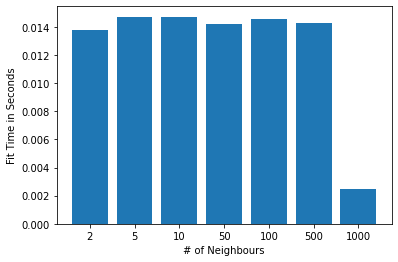

In [48]:
plt.bar(range(len(knTime)), list(knTime.values()), align='center')
plt.xticks(range(len(knTime)), list(knTime.keys()))
plt.xlabel("# of Neighbours")
plt.ylabel("Fit Time in Seconds")
plt.show()

## Decision Trees Algorithm

In [35]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)

from sklearn import tree, ensemble
scores = cross_validate(tree.DecisionTreeRegressor(random_state= 42), X_train, y_train, cv=crossvalidation)

dt_time = scores['fit_time'].mean()
print(dt_time)
dt_score = scores['test_score'].mean()
print(dt_score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.1449150800704956
0.24262465299200703


### Decision Tree Regressor Tuning


In [38]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)
dtData = {}
dtTime = {}
for val in max_depth:
    scores = cross_validate(tree.DecisionTreeRegressor(max_depth= val, random_state= 42),  X_train, y_train, cv=crossvalidation)
    dtData[val] = scores['test_score'].mean()
    dtTime[val] = scores['fit_time'].mean()

print(dtData)
print(dtTime)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{1: 0.39373070413379413, 2: 0.5183467618214974, 3: 0.5600565458145819, 4: 0.5396866400209274, 5: 0.5259420770975506, 6: 0.47530109870039994, 7: 0.41384550851631624, 8: 0.36623918845462605, 9: 0.33198449682596254, 10: 0.3171355139803254}
{1: 0.012320923805236816, 2: 0.021270489692687987, 3: 0.02981991767883301, 4: 0.04084503650665283, 5: 0.04976794719696045, 6: 0.05847511291503906, 7: 0.06920058727264404, 8: 0.07790687084197997, 9: 0.08802995681762696, 10: 0.0963474988937378}


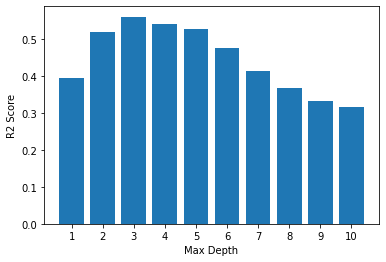

In [45]:
plt.bar(range(len(dtData)), list(dtData.values()), align='center')
plt.xticks(range(len(dtData)), list(dtData.keys()))
plt.xlabel("Max Depth")
plt.ylabel("R2 Score")
plt.show()

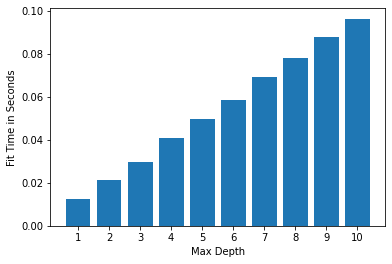

In [46]:
plt.bar(range(len(dtTime)), list(dtTime.values()), align='center')
plt.xticks(range(len(dtTime)), list(dtTime.keys()))
plt.xlabel("Max Depth")
plt.ylabel("Fit Time in Seconds")
plt.show()

## Random Forest Algorithm

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [61]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
model = regressor.fit(X_train, y_train.values.ravel())

crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)
scores = cross_validate(model, X_train, y_train.values.ravel(), cv=crossvalidation)

rf_time = scores['fit_time'].mean()
print(rf_time)
rf_score = scores['test_score'].mean()
print(rf_score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8384454011917114
0.6004312245532181


### Random Forest Regressor Tuning


In [49]:
estimators = [50, 100, 150, 200, 250, 300, 350]
rfData = {}
rfTime = {}
for count in estimators:
    scores = cross_validate(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X_train, y_train.values.ravel(), cv=crossvalidation)
    print(f'For estimators: {count}')
    print(scores['test_score'].mean())
    rfData[count] = scores['test_score'].mean()
    rfTime[count] = scores['fit_time'].mean()
print(rfData)
print(rfTime)

For estimators: 50
0.6436973460537603
For estimators: 100
0.64901452874395
For estimators: 150
0.6511123880610399
For estimators: 200
0.6498680736237065
For estimators: 250
0.6501661213773756
For estimators: 300
0.6509725124502566
For estimators: 350
0.651560837792919
{50: 0.6436973460537603, 100: 0.64901452874395, 150: 0.6511123880610399, 200: 0.6498680736237065, 250: 0.6501661213773756, 300: 0.6509725124502566, 350: 0.651560837792919}
{50: 4.191259598731994, 100: 8.337680983543397, 150: 12.56364459991455, 200: 16.737444710731506, 250: 20.962499046325682, 300: 25.046987223625184, 350: 29.195986580848693}


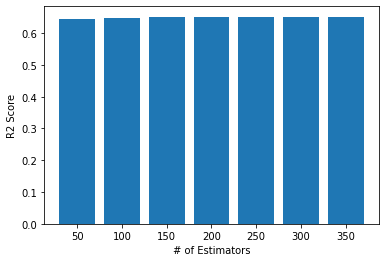

In [50]:
plt.bar(range(len(rfData)), list(rfData.values()), align='center')
plt.xticks(range(len(rfData)), list(rfData.keys()))
plt.xlabel("# of Estimators")
plt.ylabel("R2 Score")
plt.show()

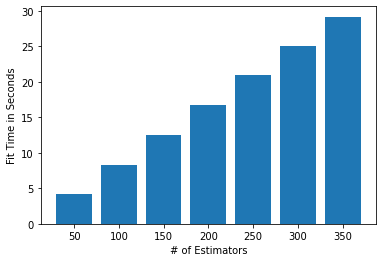

In [51]:
plt.bar(range(len(rfTime)), list(rfTime.values()), align='center')
plt.xticks(range(len(rfTime)), list(rfTime.keys()))
plt.xlabel("# of Estimators")
plt.ylabel("Fit Time in Seconds")
plt.show()

In [63]:
allScores = {
  "Linear\nRegression": lr_score,
  "K-NN\nRegression": kn_score,
  "Decision\nTrees": dt_score,
  "Random\nForest": rf_score
}

allTimes = {
  "Linear\nRegression": lr_time,
  "K-NN\nRegression": kn_time,
  "Decision\nTrees": dt_time,
  "Random\nForest": rf_time
}

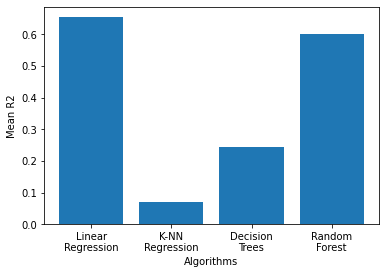

In [64]:
plt.bar(range(len(allScores)), list(allScores.values()), align='center')
plt.xticks(range(len(allScores)), list(allScores.keys()))
plt.xlabel("Algorithms")
plt.ylabel("Mean R2")
plt.show()

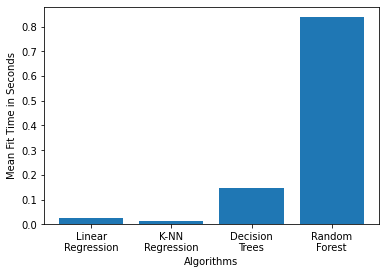

In [65]:
plt.bar(range(len(allTimes)), list(allTimes.values()), align='center')
plt.xticks(range(len(allTimes)), list(allTimes.keys()))
plt.xlabel("Algorithms")
plt.ylabel("Mean Fit Time in Seconds")
plt.show()